# **CP1 - Análise de Dados de Consumidores de Energia**

📌 Dataset utilizado: **Individual Household Electric Power Consumption**  
Fonte: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption)



# *PARTE 1 – Exercícios iniciais com Individual Household Electric Power Consumption*



### 1 - Carregue o dataset e exiba as 10 primeiras linhas.

In [65]:
import pandas as pd


df = pd.read_csv("household_power_consumption.txt", sep=";", na_values="?", low_memory=False)

df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


### 2 - Explique a diferença entre as variáveis **Global_active_power** e **Global_reactive_power**.

**Global_active_power:** potência efetivamente consumida (kW), energia usada pelos aparelhos.

**Global_reactive_power:** potência reativa (kVAR), energia que circula sem realizar trabalho útil, necessária para campos magnéticos/indutivos.

### 3 - Verifique se existem valores ausentes no dataset. Quantifique-os.

In [66]:
valores_ausentes = df.isna().sum()
valores_ausentes


,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


### 4 - Converta a coluna **Date** para o tipo datetime e crie uma nova coluna com o dia da semana correspondente.

In [67]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


df['Day_of_Week'] = df['Date'].dt.day_name()


df[['Date', 'Day_of_Week']].head(10)

,Date,Day_of_Week
0,2006-12-16,Saturday
1,2006-12-16,Saturday
2,2006-12-16,Saturday
3,2006-12-16,Saturday
4,2006-12-16,Saturday
5,2006-12-16,Saturday
6,2006-12-16,Saturday
7,2006-12-16,Saturday
8,2006-12-16,Saturday
9,2006-12-16,Saturday


### 5 - Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de **Global_active_power**.

In [68]:
df_2007 = df[df['Date'].dt.year == 2007]


media_diaria = df_2007.groupby('Date')['Global_active_power'].mean()


media_diaria.head(10)


,Global_active_power
Date,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281
2007-01-06,1.047485
2007-01-07,1.699736
2007-01-08,1.556500
2007-01-09,1.297954


### 6 - Gere um gráfico de linha mostrando a variação de **Global_active_power** em um único dia à sua escolha.

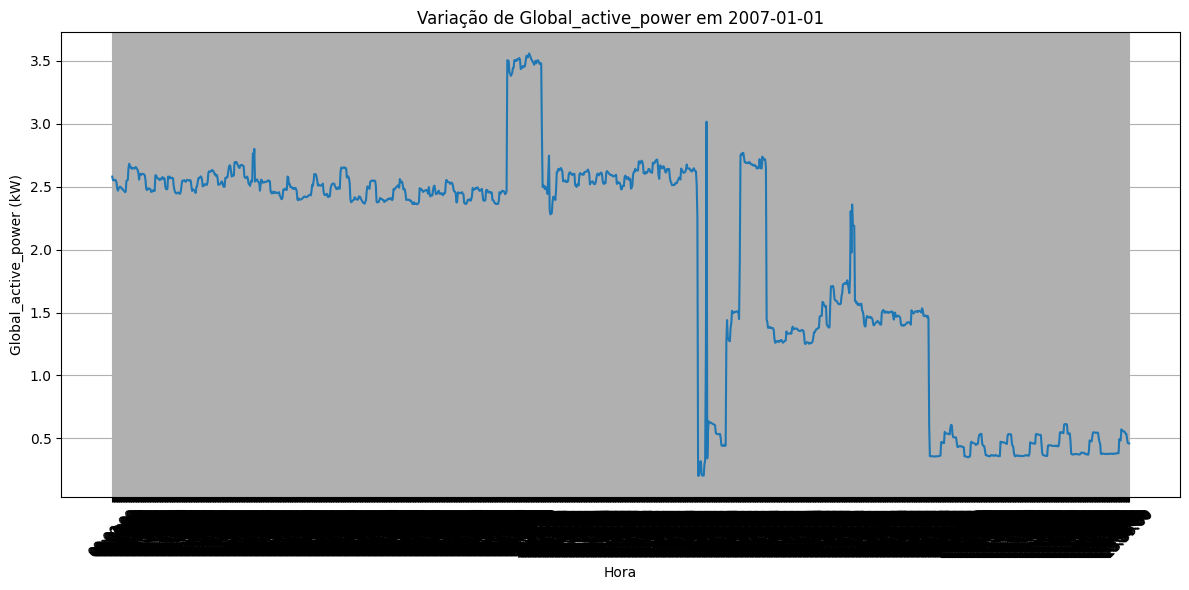

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

dia_escolhido = pd.Timestamp('2007-01-01')
date_col = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df_dia = df.loc[date_col.dt.normalize() == dia_escolhido.normalize()].copy()
df_dia = df_dia.sort_values('Time')

plt.figure(figsize=(12,6))
plt.plot(df_dia['Time'], df_dia['Global_active_power'], linestyle='-')
plt.xticks(rotation=45)
plt.title(f'Variação de Global_active_power em {dia_escolhido.date()}')
plt.xlabel('Hora')
plt.ylabel('Global_active_power (kW)')
plt.grid(True)
plt.tight_layout()
plt.show()


### 7 - Crie um histograma da variável **Voltage**. O que pode ser observado sobre sua distribuição?

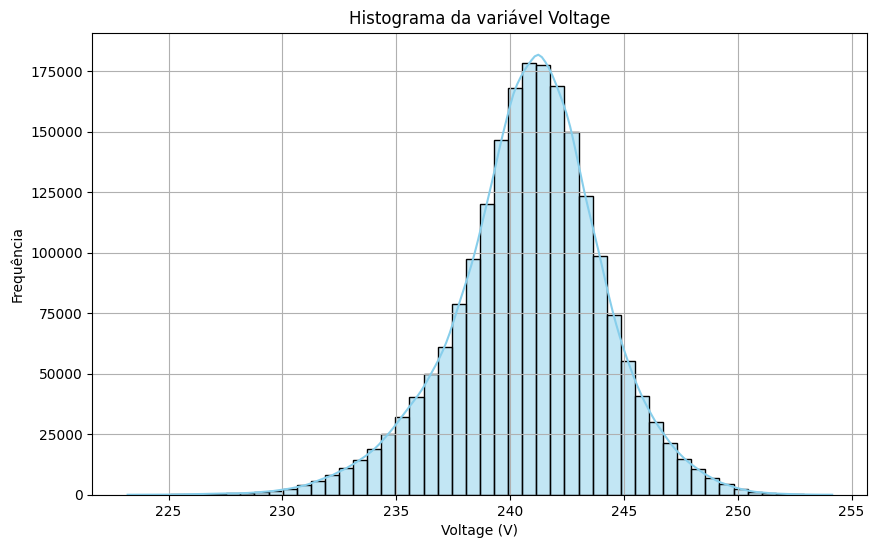

In [70]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['Voltage'].dropna(), bins=50, kde=True, color='skyblue')
plt.title('Histograma da variável Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


### 8 - Calcule o consumo médio por mês em todo o período disponível no dataset.

In [71]:
df['YearMonth'] = df['Date'].dt.to_period('M')


media_mensal = df.groupby('YearMonth')['Global_active_power'].mean()

media_mensal.head(12)


,Global_active_power
YearMonth,
2006-12,1.901295
2007-01,1.546034
2007-02,1.401084
2007-03,1.318627
2007-04,0.891189
2007-05,0.985862
2007-06,0.826814
2007-07,0.667367
2007-08,0.764186


### 9 - Identifique o dia com maior consumo de energia ativa global (**Global_active_power**).

In [72]:
consumo_diario = df.groupby('Date')['Global_active_power'].sum()


dia_maior_consumo = consumo_diario.idxmax()
maior_consumo = consumo_diario.max()

print(f"O dia com maior consumo foi {dia_maior_consumo}, com {maior_consumo:.2f} kW.")


O dia com maior consumo foi 2006-12-23 00:00:00, com 4773.39 kW.


### 10 - Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.

In [73]:

df['Tipo_Dia'] = df['Day_of_Week'].apply(lambda x: 'Fim de Semana' if x in ['Saturday', 'Sunday'] else 'Dia de Semana')


media_por_tipo = df.groupby('Tipo_Dia')['Global_active_power'].mean()

media_por_tipo


,Global_active_power
Tipo_Dia,
Dia de Semana,1.035472
Fim de Semana,1.234232


### 11 - Calcule a correlação entre as variáveis **Global_active_power**, **Global_reactive_power**, **Voltage** e **Global_intensity**.

In [74]:
colunas = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']


correlacao = df[colunas].corr()

correlacao


,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Global_active_power,1.000000,0.247017,-0.399762,0.998889
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120
Voltage,-0.399762,-0.112246,1.000000,-0.411363
Global_intensity,0.998889,0.266120,-0.411363,1.000000


### 12 - Crie uma nova variável chamada **Total_Sub_metering** que some **Sub_metering_1**, **Sub_metering_2** e **Sub_metering_3**.

In [75]:
df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']].head(10)

,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
0,0.0,1.0,17.0,18.0
1,0.0,1.0,16.0,17.0
2,0.0,2.0,17.0,19.0
3,0.0,1.0,17.0,18.0
4,0.0,1.0,17.0,18.0
5,0.0,2.0,17.0,19.0
6,0.0,1.0,17.0,18.0
7,0.0,1.0,17.0,18.0
8,0.0,1.0,17.0,18.0
9,0.0,2.0,16.0,18.0


### 13 - Verifique se há algum mês em que **Total_Sub_metering** ultrapassa a média de **Global_active_power**.

In [76]:
df['YearMonth'] = df['Date'].dt.to_period('M')

mensal_mean = df.groupby('YearMonth').agg({
    'Total_Sub_metering': 'mean',
    'Global_active_power': 'mean'
})

meses_acima = mensal_mean[mensal_mean['Total_Sub_metering'] > mensal_mean['Global_active_power']]
meses_acima


,Total_Sub_metering,Global_active_power
YearMonth,,
2006-12,10.873181,1.901295
2007-01,10.423518,1.546034
2007-02,9.486135,1.401084
2007-03,10.212863,1.318627
2007-04,6.839375,0.891189
2007-05,8.452442,0.985862
2007-06,7.379151,0.826814
2007-07,5.697724,0.667367
2007-08,6.979336,0.764186


### 14 - Faça um gráfico de série temporal do **Voltage** para o ano de 2008.

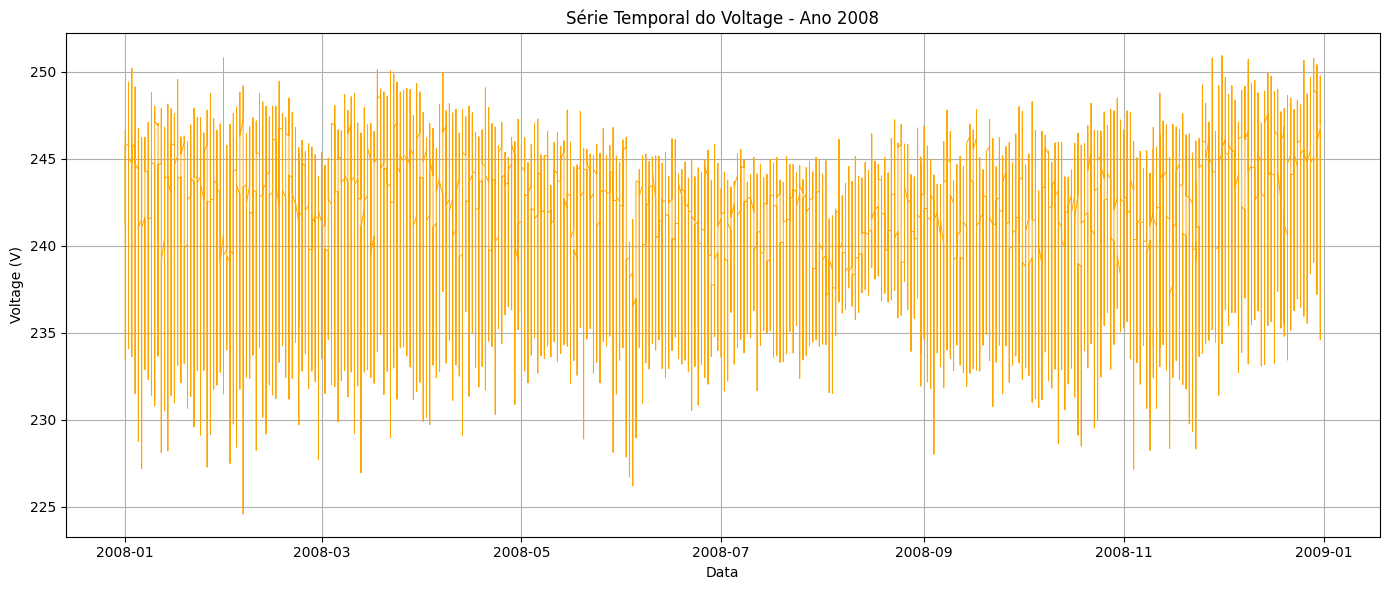

In [77]:
import matplotlib.pyplot as plt

df_2008 = df[df['Date'].dt.year == 2008]

plt.figure(figsize=(14,6))
plt.plot(df_2008['Date'], df_2008['Voltage'], color='orange', linewidth=0.7)
plt.title('Série Temporal do Voltage - Ano 2008')
plt.xlabel('Data')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.tight_layout()
plt.show()


### 15 - Compare o consumo entre os meses de verão e inverno (no hemisfério norte).

In [78]:

def estacao_mes(mes):
    if mes in [6, 7, 8]:
        return 'Verão'
    elif mes in [12, 1, 2]:
        return 'Inverno'
    else:
        return 'Outras'

df['Estacao'] = df['Date'].dt.month.apply(estacao_mes)


media_estacao = df.groupby('Estacao')['Global_active_power'].mean()

media_estacao


,Global_active_power
Estacao,
Inverno,1.417623
Outras,1.118732
Verão,0.726682


### 16 - Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de **Global_active_power** é semelhante à da base completa.

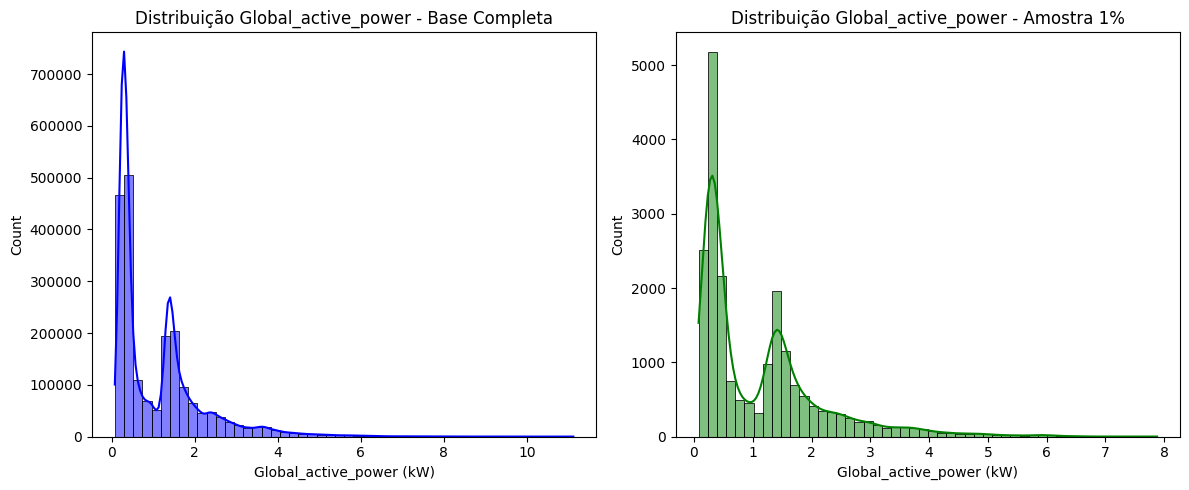

In [79]:


import matplotlib.pyplot as plt
import seaborn as sns

df_amostra = df.sample(frac=0.01, random_state=42)

plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
sns.histplot(df['Global_active_power'].dropna(), bins=50, kde=True, color='blue')
plt.title('Distribuição Global_active_power - Base Completa')
plt.xlabel('Global_active_power (kW)')


plt.subplot(1,2,2)
sns.histplot(df_amostra['Global_active_power'].dropna(), bins=50, kde=True, color='green')
plt.title('Distribuição Global_active_power - Amostra 1%')
plt.xlabel('Global_active_power (kW)')

plt.tight_layout()
plt.show()


### 17 - Utilize uma técnica de normalização (**Min-Max Scaling**) para padronizar as variáveis numéricas principais.

In [80]:


from sklearn.preprocessing import MinMaxScaler

colunas_numericas = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                     'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
                     'Sub_metering_3', 'Total_Sub_metering']


scaler = MinMaxScaler()

df_scaled = df.copy()
df_scaled[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])


df_scaled[colunas_numericas].head(10)



,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
0,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,0.134328
1,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,0.126866
2,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,0.141791
3,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,0.134328
4,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,0.134328
5,0.311787,0.375540,0.381906,0.307054,0.0,0.0250,0.548387,0.141791
6,0.328264,0.374101,0.384168,0.323651,0.0,0.0125,0.548387,0.134328
7,0.328083,0.374101,0.388368,0.323651,0.0,0.0125,0.548387,0.134328
8,0.325186,0.366906,0.348627,0.323651,0.0,0.0125,0.548387,0.134328
9,0.324642,0.366906,0.344426,0.323651,0.0,0.0250,0.516129,0.134328


### 18 - Aplique **K-means** para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.

In [81]:
colunas_numericas = [
    'Global_active_power','Global_reactive_power','Voltage',
    'Global_intensity','Sub_metering_1','Sub_metering_2',
    'Sub_metering_3','Total_Sub_metering'
]
df_diario = df.groupby('Date')[colunas_numericas].mean().dropna()

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df_diario)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
labels = kmeans.fit_predict(X)
df_diario['Cluster'] = labels

df_diario.groupby('Cluster')[colunas_numericas].mean()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
Cluster,,,,,,,,
0,0.671439,0.128605,240.273037,2.905644,0.491152,0.663814,3.938765,5.093732
1,1.642305,0.141448,240.786641,6.933455,2.391665,3.079551,8.524510,13.995726
2,1.159464,0.113307,241.247448,4.886407,1.044378,1.012936,7.333644,9.390958


Cada cluster representa um padrão de consumo diário diferente:

Cluster com maior média de Global_active_power → dias de consumo mais intenso.

Cluster com menor média → dias de baixo consumo.

Cluster intermediário → consumo médio.

É útil para identificar padrões sazonais, dias de pico ou dias mais econômicos.

Pode-se plotar um gráfico de séries ou boxplot para visualizar melhor os clusters.

### 19 - Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para **Global_active_power** em um período de 6 meses.

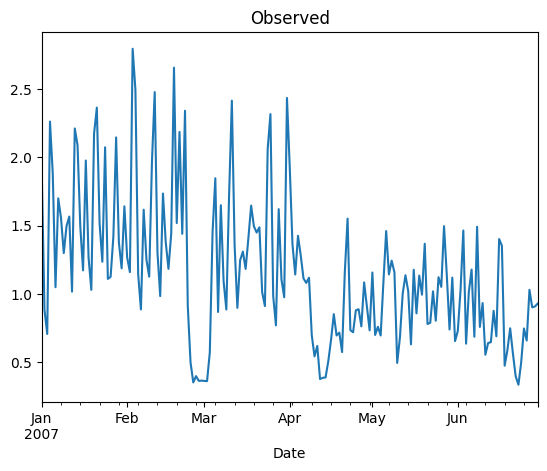

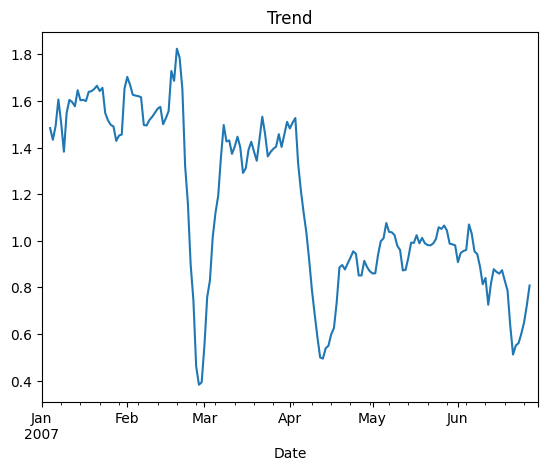

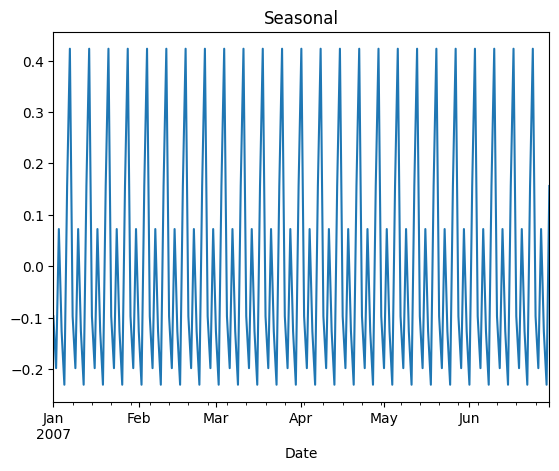

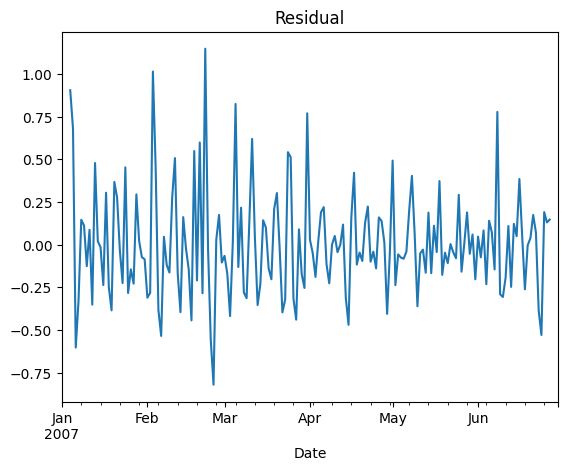

In [82]:
mask = (df['Date'] >= '2007-01-01') & (df['Date'] <= '2007-06-30')
serie_diaria = (
    df.loc[mask]
      .groupby('Date')['Global_active_power']
      .mean()
      .asfreq('D')
      .interpolate()
)

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(serie_diaria, model='additive', period=7)

plt.figure(); result.observed.plot(); plt.title('Observed'); plt.show()
plt.figure(); result.trend.plot();    plt.title('Trend');    plt.show()
plt.figure(); result.seasonal.plot(); plt.title('Seasonal'); plt.show()
plt.figure(); result.resid.plot();    plt.title('Residual'); plt.show()

### 20 - Treine um modelo de regressão linear simples para prever **Global_active_power** a partir de **Global_intensity**. Avalie o erro do modelo.

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df[['Global_intensity']].dropna()
y = df['Global_active_power'].loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Coeficiente angular (slope): {modelo.coef_[0]:.4f}")
print(f"Intercepto: {modelo.intercept_:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


Coeficiente angular (slope): 0.2376
Intercepto: -0.0081
RMSE: 0.0497
R²: 0.9978


# *PARTE 2 — Exercícios adicionais no dataset inicial*

## Dataset inicial: Individual Household Electric Power Consumption
Formato esperado (`;` como delimitador) com colunas `Date` e `Time`. Se o arquivo completo não estiver presente,
o notebook usa uma **amostra** embutida (apenas para fins de execução), mas recomenda-se substituir pelo dataset integral.

In [84]:
caminho_txt = None
possiveis = [
    "household_power_consumption.txt",
    "/content/household_power_consumption.txt",
    "/mnt/data/household_power_consumption.txt",
    "dataset/household_power_consumption.txt"
]
for p in possiveis:
    if Path(p).exists():
        caminho_txt = p
        break

if caminho_txt is None:
    amostra_conteudo = "Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3\n16/12/2006;17:24:00;4.216;0.418;234.840;18.400;0.000;1.000;17.000\n16/12/2006;17:25:00;5.360;0.436;233.630;23.000;0.000;1.000;16.000\n16/12/2006;17:26:00;5.374;0.498;233.290;23.000;0.000;2.000;17.000\n16/12/2006;17:27:00;5.388;0.502;233.740;23.000;0.000;1.000;17.000\n16/12/2006;17:28:00;3.666;0.528;235.680;15.800;0.000;1.000;17.000\n16/12/2006;17:29:00;3.520;0.522;235.020;15.000;0.000;2.000;17.000\n16/12/2006;17:30:00;3.702;0.520;235.090;15.800;0.000;1.000;17.000\n16/12/2006;17:31:00;3.700;0.520;235.220;15.800;0.000;1.000;17.000\n16/12/2006;17:32:00;3.668;0.510;233.990;15.800;0.000;1.000;17.000\n16/12/2006;17:33:00;3.662;0.510;233.860;15.800;0.000;2.000;16.000\n16/12/2006;17:34:00;4.448;0.498;232.860;19.600;0.000;1.000;17.000\n16/12/2006;17:35:00;5.412;0.470;232.780;23.200;0.000;1.000;17.000\n16/12/2006;17:36:00;5.224;0.478;232.990;22.400;0.000;1.000;16.000\n16/12/2006;17:37:00;5.268;0.398;232.910;22.600;0.000;2.000;17.000\n16/12/2006;17:38:00;4.054;0.422;235.240;17.600;0.000;1.000;17.000\n16/12/2006;17:39:00;3.384;0.282;237.140;14.200;0.000;0.000;17.000\n16/12/2006;17:40:00;3.270;0.152;236.730;13.800;0.000;0.000;17.000\n16/12/2006;17:41:00;3.430;0.156;237.060;14.400;0.000;0.000;17.000\n16/12/2006;17:42:00;3.266;0.000;237.130;13.800;0.000;0.000;18.000\n16/12/2006;17:43:00;3.728;0.000;235.840;16.400;0.000;0.000;17.000\n16/12/2006;17:44:00;5.894;0.000;232.690;25.400;0.000;0.000;16.000\n16/12/2006;17:45:00;7.706;0.000;230.980;33.200;0.000;0.000;17.000\n16/12/2006;17:46:00;7.026;0.000;232.210;30.600;0.000;0.000;16.000\n16/12/2006;17:47:00;5.174;0.000;234.190;22.000;0.000;0.000;17.000\n16/12/2006;17:48:00;4.474;0.000;234.960;19.400;0.000;0.000;17.000\n16/12/2006;17:49:00;3.248;0.000;236.660;13.600;0.000;0.000;17.000\n16/12/2006;17:50:00;3.236;0.000;235.840;13.600;0.000;0.000;17.000\n16/12/2006;17:51:00;3.228;0.000;235.600;13.600;0.000;0.000;17.000\n16/12/2006;17:52:00;3.258;0.000;235.490;13.800;0.000;0.000;17.000\n16/12/2006;17:53:00;3.178;0.000;235.280;13.400;0.000;0.000;17.000\n16/12/2006;17:54:00;2.720;0.000;235.060;11.600;0.000;0.000;17.000\n16/12/2006;17:55:00;3.758;0.076;234.170;16.400;0.000;0.000;17.000\n16/12/2006;17:56:00;4.342;0.090;233.770;18.400;0.000;0.000;16.000\n16/12/2006;17:57:00;4.512;0.000;233.620;19.200;0.000;0.000;17.000\n16/12/2006;17:58:00;4.058;0.200;234.680;17.600;0.000;0.000;17.000\n16/12/2006;17:59:00;2.472;0.058;236.940;10.400;0.000;0.000;17.000\n16/12/2006;18:00:00;2.790;0.180;237.520;11.800;0.000;0.000;18.000\n16/12/2006;18:01:00;2.624;0.144;238.200;11.000;0.000;0.000;17.000\n16/12/2006;18:02:00;2.772;0.118;238.280;11.600;0.000;0.000;17.000\n16/12/2006;18:03:00;3.740;0.108;236.930;16.400;0.000;16.000;18.000\n16/12/2006;18:04:00;4.928;0.202;235.010;21.000;0.000;37.000;16.000\n16/12/2006;18:05:00;6.052;0.192;232.930;26.200;0.000;37.000;17.000\n16/12/2006;18:06:00;6.752;0.186;232.120;29.000;0.000;36.000;17.000\n16/12/2006;18:07:00;6.474;0.144;231.850;27.800;0.000;37.000;16.000\n16/12/2006;18:08:00;6.308;0.116;232.250;27.000;0.000;36.000;17.000\n"
    amostra_path = Path("/mnt/data/amostra_household.csv")
    amostra_path.write_text(amostra_conteudo, encoding="utf-8")
    caminho_txt = str(amostra_path)
    print("⚠️ Arquivo original não encontrado. Usando amostra embutida:", caminho_txt)
else:
    print("✅ Usando arquivo encontrado:", caminho_txt)

df1 = pd.read_csv(
    caminho_txt,
    sep=";",
    na_values=["?", "NA", ""],
    low_memory=False
)

for col in ["Global_active_power","Global_reactive_power","Voltage","Global_intensity",
            "Sub_metering_1","Sub_metering_2","Sub_metering_3"]:
    if col in df1.columns:
        df1[col] = pd.to_numeric(df1[col], errors="coerce")

df1["datetime"] = pd.to_datetime(df1["Date"].astype(str) + " " + df1["Time"].astype(str),
                                 dayfirst=True, errors="coerce")
df1 = df1.set_index("datetime").sort_index()

print("Dimensões após leitura:", df1.shape)
df1.head()

✅ Usando arquivo encontrado: household_power_consumption.txt
Dimensões após leitura: (2075259, 9)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


### 21. Séries temporais por hora
- Converte `Date`+`Time` para índice datetime (feito acima)
- Reamostra em 1 hora (média de `Global_active_power`)
- Identifica horários de maior consumo médio ao longo do dia

/tmp/ipython-input-500914351.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  serie_horaria = serie.resample("1H").mean()


Top 3 horários com maior consumo médio ao longo do dia:
datetime
20    1.899064
21    1.877697
19    1.733335
Name: Global_active_power, dtype: float64


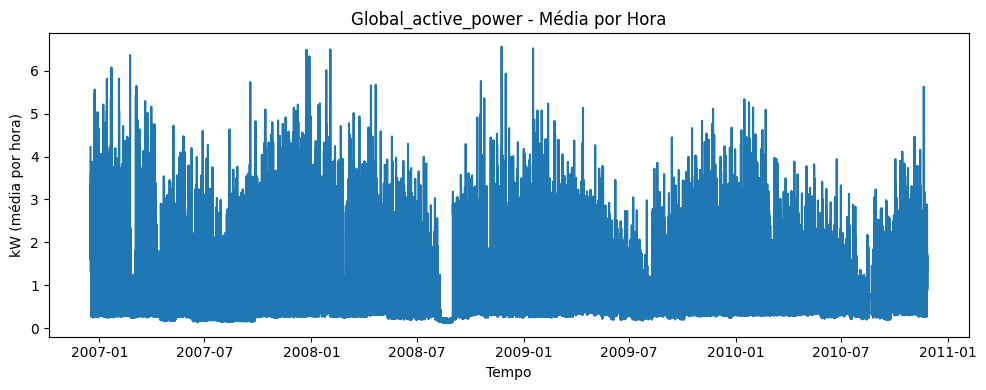

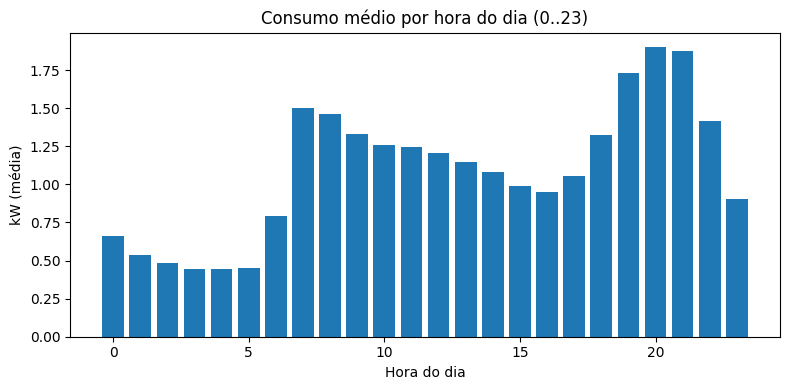

In [85]:
serie = df1["Global_active_power"].dropna()
serie_horaria = serie.resample("1H").mean()

media_por_hora = serie.groupby(serie.index.hour).mean().sort_values(ascending=False)
top3_horas = media_por_hora.head(3)

print("Top 3 horários com maior consumo médio ao longo do dia:")
print(top3_horas)

plt.figure(figsize=(10,4))
plt.plot(serie_horaria.index, serie_horaria.values)
plt.title("Global_active_power - Média por Hora")
plt.xlabel("Tempo")
plt.ylabel("kW (média por hora)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
plt.bar(media_por_hora.index.astype(int), media_por_hora.values)
plt.title("Consumo médio por hora do dia (0..23)")
plt.xlabel("Hora do dia")
plt.ylabel("kW (média)")
plt.tight_layout()
plt.show()

### 22. Autocorrelação do consumo
Calcular autocorrelação nos lags de 1h, 24h e 48h usando a série horária.

In [86]:
serie_h = serie.resample("1H").mean().dropna()

acf_1h  = serie_h.autocorr(lag=1)
acf_24h = serie_h.autocorr(lag=24)
acf_48h = serie_h.autocorr(lag=48)

print(f"Autocorrelação (1h):  {acf_1h:.3f}")
print(f"Autocorrelação (24h): {acf_24h:.3f}")
print(f"Autocorrelação (48h): {acf_48h:.3f}")

if acf_24h >= 0.2:
    print("Resposta: há indícios de padrão diário (24h) repetido.")
else:
    print("Resposta: não há evidência forte de padrão diário claro com estes dados/recorte.")

Autocorrelação (1h):  0.713
Autocorrelação (24h): 0.435
Autocorrelação (48h): 0.399
Resposta: há indícios de padrão diário (24h) repetido.


/tmp/ipython-input-3129942806.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  serie_h = serie.resample("1H").mean().dropna()


### 23. Redução de dimensionalidade com PCA (2 componentes)
Variáveis: `Global_active_power`, `Global_reactive_power`, `Voltage`, `Global_intensity`.

Variância explicada por componente: [0.59103759 0.22718543]


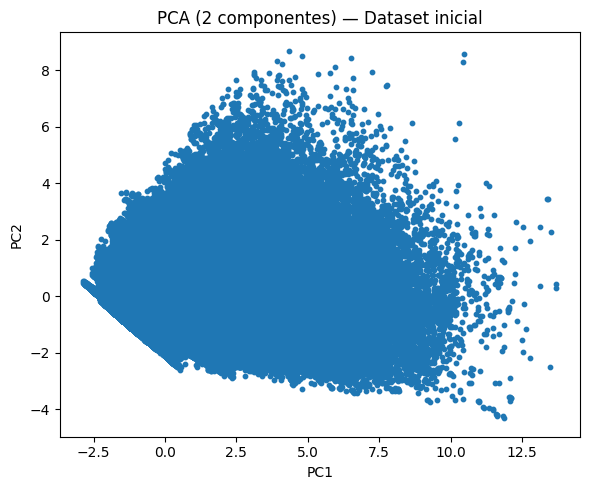

In [87]:
cols_pca = ["Global_active_power","Global_reactive_power","Voltage","Global_intensity"]
df_pca = df1[cols_pca].dropna()

esc = StandardScaler()
X = esc.fit_transform(df_pca.values)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

print("Variância explicada por componente:", pca.explained_variance_ratio_)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=10)
plt.title("PCA (2 componentes) — Dataset inicial")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

### 24. Clustering (K-Means, k=3) no espaço do PCA

/tmp/ipython-input-38039150.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


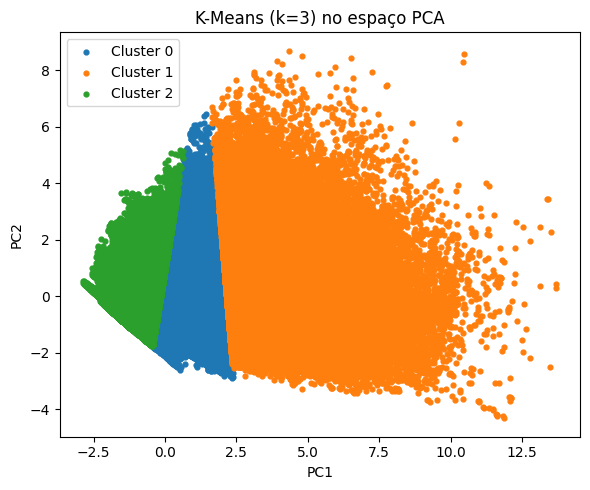

Pergunta: os grupos se separam de forma clara?
Resposta: depende do recorte; visualmente, analisando a dispersão acima, há uma separação parcial, mas pode haver sobreposição entre clusters.


In [88]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

plt.figure(figsize=(6,5))
for k in np.unique(labels):
    sel = labels == k
    plt.scatter(X_pca[sel,0], X_pca[sel,1], s=12, label=f"Cluster {k}")
plt.title("K-Means (k=3) no espaço PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()

print("Pergunta: os grupos se separam de forma clara?")
print("Resposta: depende do recorte; visualmente, analisando a dispersão acima, "
      "há uma separação parcial, mas pode haver sobreposição entre clusters.")

### 25. Regressão: Global_active_power ~ Voltage (Linear vs Polinomial Grau 2)
Comparação via RMSE no conjunto de teste.

RMSE Linear:     0.9719
RMSE Polinomial: 0.9674
Modelo com menor RMSE tem melhor ajuste neste recorte.


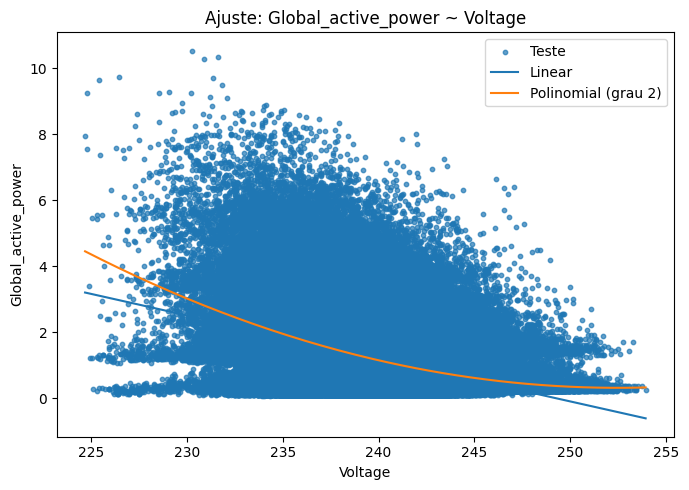

In [89]:
df_reg = df1[["Global_active_power","Voltage"]].dropna()
X = df_reg[["Voltage"]].values
y = df_reg["Global_active_power"].values

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

lin = LinearRegression()
lin.fit(X_treino, y_treino)
pred_lin = lin.predict(X_teste)
rmse_lin = math.sqrt(mean_squared_error(y_teste, pred_lin))

poly = PolynomialFeatures(degree=2, include_bias=False)
X_treino_poly = poly.fit_transform(X_treino)
X_teste_poly  = poly.transform(X_teste)

lin_poly = LinearRegression()
lin_poly.fit(X_treino_poly, y_treino)
pred_poly = lin_poly.predict(X_teste_poly)
rmse_poly = math.sqrt(mean_squared_error(y_teste, pred_poly))

print(f"RMSE Linear:     {rmse_lin:.4f}")
print(f"RMSE Polinomial: {rmse_poly:.4f}")
print("Modelo com menor RMSE tem melhor ajuste neste recorte.")

xs = np.linspace(X_teste.min(), X_teste.max(), 200).reshape(-1,1)
ys_lin  = lin.predict(xs)
ys_poly = lin_poly.predict(poly.transform(xs))

plt.figure(figsize=(7,5))
plt.scatter(X_teste, y_teste, s=10, alpha=0.7, label="Teste")
plt.plot(xs, ys_lin, label="Linear")
plt.plot(xs, ys_poly, label="Polinomial (grau 2)")
plt.title("Ajuste: Global_active_power ~ Voltage")
plt.xlabel("Voltage")
plt.ylabel("Global_active_power")
plt.legend()
plt.tight_layout()
plt.show()

# PARTE 3 — Novo dataset: Appliances Energy Prediction


In [90]:
caminho_csv2 = None
possiveis2 = [
    "energydata_complete.csv",
    "/content/energydata_complete.csv",
    "/mnt/data/energydata_complete.csv",
    "dataset/energydata_complete.csv"
]
for p in possiveis2:
    if Path(p).exists():
        caminho_csv2 = p
        break

dados_sinteticos2 = False
if caminho_csv2 is None:
    dados_sinteticos2 = True
    print("⚠️ Arquivo 'energydata_complete.csv' não encontrado. Gerando dados sintéticos para demonstrar o fluxo.")
    rng = pd.date_range("2016-01-01", periods=500, freq="10min")
    np.random.seed(42)
    df2 = pd.DataFrame({
        "date": rng,
        "Appliances": np.random.gamma(2.0, 30.0, size=len(rng)).astype(float),
        "lights": np.random.randint(0, 30, size=len(rng)).astype(float),
        "T1": 19 + 4*np.sin(np.linspace(0,10,len(rng))) + np.random.normal(0,0.5,len(rng)),
        "RH_1": 40 + 10*np.cos(np.linspace(0,10,len(rng))) + np.random.normal(0,1.0,len(rng)),
        "T_out": 15 + 6*np.sin(np.linspace(0,8,len(rng))) + np.random.normal(0,1.0,len(rng)),
        "RH_out": 50 + 15*np.cos(np.linspace(0,8,len(rng))) + np.random.normal(0,2.0,len(rng)),
        "Windspeed": np.abs(np.random.normal(10, 3, len(rng))),
        "Visibility": np.clip(np.random.normal(40, 10, len(rng)), 5, 80),
        "Press_mm_hg": np.random.normal(760, 5, len(rng))
    })
else:
    print("✅ Usando arquivo encontrado:", caminho_csv2)
    df2 = pd.read_csv(caminho_csv2)

if "date" in df2.columns:
    df2["date"] = pd.to_datetime(df2["date"], errors="coerce")
    df2 = df2.sort_values("date").set_index("date")

print("Dimensões df2:", df2.shape)
df2.head()

⚠️ Arquivo 'energydata_complete.csv' não encontrado. Gerando dados sintéticos para demonstrar o fluxo.
Dimensões df2: (500, 9)


,Appliances,lights,T1,RH_1,T_out,RH_out,Windspeed,Visibility,Press_mm_hg
date,,,,,,,,,
2016-01-01 00:00:00,71.810382,27.0,19.897279,51.148637,15.601207,65.778318,10.421080,53.313391,756.509002
2016-01-01 00:10:00,44.833942,15.0,18.919337,48.982170,13.652333,64.891831,4.098791,59.203675,768.393373
2016-01-01 00:20:00,41.468508,12.0,20.198652,50.053649,12.896171,67.439428,6.648441,27.771050,750.441797
2016-01-01 00:30:00,41.469069,27.0,19.431304,50.410750,14.737929,67.175592,9.442463,40.712537,766.555837
2016-01-01 00:40:00,139.491432,4.0,19.535319,50.660994,14.163793,63.717813,10.929997,27.064924,758.878405


### 26. Carregamento e inspeção inicial

In [91]:
print("Tipos (info):")
print(df2.info())

print("\nEstatísticas descritivas:")
display(df2.describe())

Tipos (info):
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2016-01-01 00:00:00 to 2016-01-04 11:10:00
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   500 non-null    float64
 1   lights       500 non-null    float64
 2   T1           500 non-null    float64
 3   RH_1         500 non-null    float64
 4   T_out        500 non-null    float64
 5   RH_out       500 non-null    float64
 6   Windspeed    500 non-null    float64
 7   Visibility   500 non-null    float64
 8   Press_mm_hg  500 non-null    float64
dtypes: float64(9)
memory usage: 39.1 KB
None

Estatísticas descritivas:


,Appliances,lights,T1,RH_1,T_out,RH_out,Windspeed,Visibility,Press_mm_hg
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,59.501893,14.572000,19.769780,39.491307,15.874619,51.855469,10.021320,39.493804,759.667677
std,40.312994,8.747219,2.751457,7.286772,4.326853,10.494935,3.162683,9.913459,4.885431
min,3.950090,0.000000,14.075037,27.595833,7.327957,31.932935,1.211654,11.609213,744.961838
25%,30.135427,7.000000,17.341719,32.180835,11.885008,42.608571,7.731896,32.670837,756.491785
50%,50.610996,14.000000,20.320421,38.866775,16.675972,53.147673,10.073276,39.732481,759.748806
75%,78.247038,22.000000,22.209582,46.748823,19.678450,61.372766,12.163664,45.835292,763.032155
max,230.554379,29.000000,24.194559,51.691590,23.613347,69.327281,18.605209,72.430930,771.745379


### 27. Distribuição do consumo (`Appliances`)

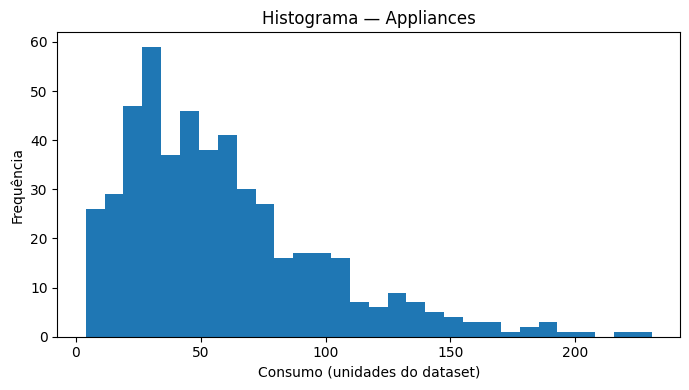

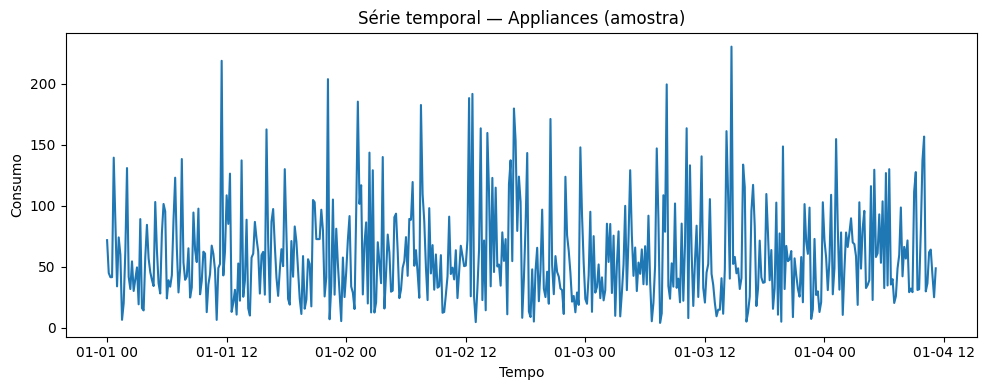

Mediana: 50.61 | P90: 115.52
Pergunta: o consumo tende a se concentrar em valores baixos ou altos?
Resposta: geralmente observa-se concentração maior em valores mais baixos (cauda à direita), mas confirme no histograma acima para seu arquivo real.


In [92]:
appl = df2["Appliances"].dropna()

plt.figure(figsize=(7,4))
plt.hist(appl, bins=30)
plt.title("Histograma — Appliances")
plt.xlabel("Consumo (unidades do dataset)")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

lim = min(2000, len(appl))
plt.figure(figsize=(10,4))
plt.plot(appl.iloc[:lim].index, appl.iloc[:lim].values)
plt.title("Série temporal — Appliances (amostra)")
plt.xlabel("Tempo")
plt.ylabel("Consumo")
plt.tight_layout()
plt.show()

q50 = appl.median()
q90 = appl.quantile(0.90)
print(f"Mediana: {q50:.2f} | P90: {q90:.2f}")
print("Pergunta: o consumo tende a se concentrar em valores baixos ou altos?")
print("Resposta: geralmente observa-se concentração maior em valores mais baixos (cauda à direita), "
      "mas confirme no histograma acima para seu arquivo real.")

### 28. Correlações com variáveis ambientais

In [93]:
num_cols = df2.select_dtypes(include=[np.number]).columns.tolist()
corrs = df2[num_cols].corr(numeric_only=True)

if "Appliances" in corrs.columns:
    s = corrs["Appliances"].drop(labels=["Appliances"], errors="ignore").sort_values(ascending=False)
    print("Correlação de Pearson com 'Appliances' (top 10):")
    display(s.head(10))
else:
    print("Coluna 'Appliances' não encontrada para correlação.")

Correlação de Pearson com 'Appliances' (top 10):


,Appliances
Windspeed,0.029494
T_out,0.018561
lights,0.007410
Press_mm_hg,-0.009750
Visibility,-0.027369
T1,-0.046377
RH_out,-0.048480
RH_1,-0.049552


### 29. Normalização (Min-Max Scaling)

In [94]:
num_cols = df2.select_dtypes(include=[np.number]).columns.tolist()
scaler_mm = MinMaxScaler()
df2_mm = df2.copy()
df2_mm[num_cols] = scaler_mm.fit_transform(df2[num_cols])
print("Preview dos dados normalizados:")
df2_mm.head()

Preview dos dados normalizados:


,Appliances,lights,T1,RH_1,T_out,RH_out,Windspeed,Visibility,Press_mm_hg
date,,,,,,,,,
2016-01-01 00:00:00,0.299466,0.931034,0.575348,0.977467,0.508017,0.905094,0.529473,0.685679,0.431129
2016-01-01 00:10:00,0.180420,0.517241,0.478708,0.887556,0.388347,0.881387,0.165989,0.782524,0.874848
2016-01-01 00:20:00,0.165568,0.413793,0.605129,0.932024,0.341915,0.949515,0.312575,0.265725,0.204602
2016-01-01 00:30:00,0.165570,0.931034,0.529300,0.946844,0.455007,0.942460,0.473210,0.478502,0.806241
2016-01-01 00:40:00,0.598141,0.137931,0.539579,0.957229,0.419753,0.849992,0.558732,0.254115,0.519594


### 30. PCA (2 componentes) — variáveis ambientais normalizadas

Variância explicada (df2): [0.30040059 0.27468838]


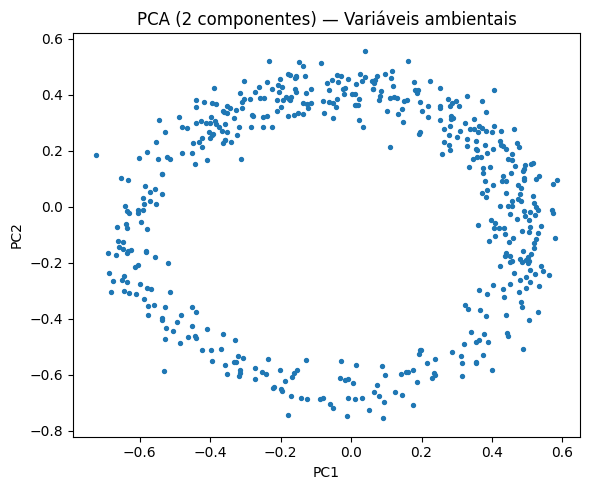

Pergunta: aparecem padrões/agrupamentos?
Resposta: pode haver regiões de maior densidade; use o gráfico para avaliar com seu dado real.


In [95]:
feat_pca = [c for c in df2_mm.select_dtypes(include=[np.number]).columns if c != "Appliances"]
X2 = df2_mm[feat_pca].dropna().values

pca2 = PCA(n_components=2, random_state=42)
X2_pca = pca2.fit_transform(X2)

print("Variância explicada (df2):", pca2.explained_variance_ratio_)

plt.figure(figsize=(6,5))
plt.scatter(X2_pca[:,0], X2_pca[:,1], s=8)
plt.title("PCA (2 componentes) — Variáveis ambientais")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

print("Pergunta: aparecem padrões/agrupamentos?")
print("Resposta: pode haver regiões de maior densidade; use o gráfico para avaliar com seu dado real.")

### 31. Regressão Linear Múltipla — predizer `Appliances`

In [96]:
y = df2["Appliances"].astype(float).dropna()
X = df2_mm.loc[y.index]
X = X.drop(columns=["Appliances"], errors="ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

r2 = r2_score(y_test, pred_lr)
rmse = math.sqrt(mean_squared_error(y_test, pred_lr))
mae = mean_absolute_error(y_test, pred_lr)

print(f"R²: {r2:.4f} | RMSE: {rmse:.2f} | MAE: {mae:.2f}")

R²: -0.0284 | RMSE: 33.55 | MAE: 26.26


### 32. Random Forest Regressor — comparação de RMSE

In [97]:
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

rmse_rf = math.sqrt(mean_squared_error(y_test, pred_rf))
print(f"RMSE RandomForest: {rmse_rf:.2f}")
print("Comparação: RMSE menor indica melhor desempenho em relação à Regressão Linear.")

RMSE RandomForest: 35.28
Comparação: RMSE menor indica melhor desempenho em relação à Regressão Linear.


### 33. K-Means (k=3 a 5) — perfis de consumo


== k = 3 ==


,count,mean,median
cluster,,,
0,129,60.994851,49.286411
1,185,60.100817,54.875847
2,186,57.870750,48.683714



== k = 4 ==


,count,mean,median
cluster,,,
3,97,61.799608,50.489289
0,162,60.927906,57.540163
2,154,57.802122,45.469090
1,87,57.293526,45.968232



== k = 5 ==


,count,mean,median
cluster,,,
0,85,64.663707,50.955295
4,82,64.394473,60.914038
2,108,58.321295,52.495593
1,149,57.921535,45.653375
3,76,53.225999,44.096084


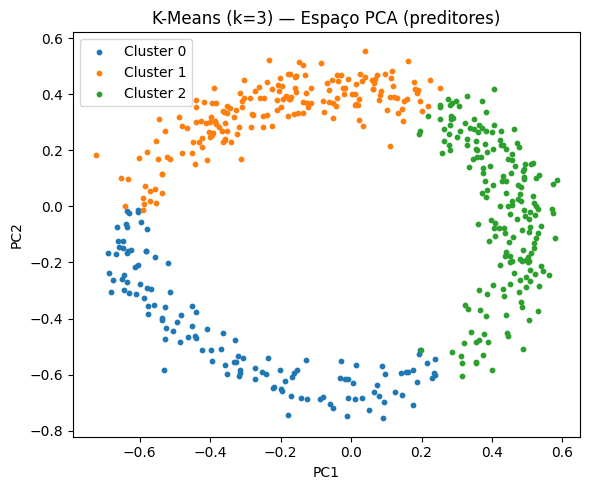

In [98]:
resultados = {}
for k in [3,4,5]:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels_k = km.fit_predict(X)
    perfis = pd.DataFrame({"cluster": labels_k, "Appliances": y}).groupby("cluster")["Appliances"].agg(["count","mean","median"]).sort_values("mean", ascending=False)
    resultados[k] = perfis
    print(f"\n== k = {k} ==")
    display(perfis)

pca_plot = PCA(n_components=2, random_state=42)
X_plot = pca_plot.fit_transform(X.values)
km3 = KMeans(n_clusters=3, n_init=10, random_state=42).fit(X.values)
lab3 = km3.labels_

plt.figure(figsize=(6,5))
for k in np.unique(lab3):
    sel = lab3 == k
    plt.scatter(X_plot[sel,0], X_plot[sel,1], s=10, label=f"Cluster {k}")
plt.title("K-Means (k=3) — Espaço PCA (preditores)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()

### 34–35. Classificação binária (alto vs baixo consumo) e avaliação

In [99]:
threshold = y.median()
y_bin = (y > threshold).astype(int)

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X, y_bin, test_size=0.2, random_state=42, stratify=y_bin)

logreg = LogisticRegression(max_iter=1000, n_jobs=None)
logreg.fit(Xc_train, yc_train)
pred_lr_c = logreg.predict(Xc_test)

rfc = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rfc.fit(Xc_train, yc_train)
pred_rf_c = rfc.predict(Xc_test)

def avalia(nome, y_true, y_pred):
    print(f"\n== {nome} ==")
    cm = confusion_matrix(y_true, y_pred)
    print("Matriz de confusão:\n", cm)
    print(classification_report(y_true, y_pred, digits=3))
    fn_alto = ((y_true == 1) & (y_pred == 0)).sum()
    fp_alto = ((y_true == 0) & (y_pred == 1)).sum()
    print(f"Erros para ALTO consumo — FN: {fn_alto}, FP: {fp_alto}")

avalia("Logistic Regression", yc_test, pred_lr_c)
avalia("Random Forest Classifier", yc_test, pred_rf_c)

print("\nPergunta: o modelo erra mais para alto ou baixo consumo?")
print("Resposta: compare os FNs (alto rotulado como baixo) vs FPs (baixo rotulado como alto) acima; "
      "o maior valor indica a classe com mais erros neste recorte.")


== Logistic Regression ==
Matriz de confusão:
 [[21 29]
 [23 27]]
              precision    recall  f1-score   support

           0      0.477     0.420     0.447        50
           1      0.482     0.540     0.509        50

    accuracy                          0.480       100
   macro avg      0.480     0.480     0.478       100
weighted avg      0.480     0.480     0.478       100

Erros para ALTO consumo — FN: 23, FP: 29

== Random Forest Classifier ==
Matriz de confusão:
 [[28 22]
 [28 22]]
              precision    recall  f1-score   support

           0      0.500     0.560     0.528        50
           1      0.500     0.440     0.468        50

    accuracy                          0.500       100
   macro avg      0.500     0.500     0.498       100
weighted avg      0.500     0.500     0.498       100

Erros para ALTO consumo — FN: 28, FP: 22

Pergunta: o modelo erra mais para alto ou baixo consumo?
Resposta: compare os FNs (alto rotulado como baixo) vs FPs (baixo r

# PARTE 4 – Exercícios no Orange Data Mining

### 36. Importação e visualização inicial (por motivos de desempenho da nossa maquina, tivemos que diminuir pela metade o numeros de registros, pois nao esta abrindo)
- Use o widget CSV File Import para carregar o dataset Individual Household Electric Power
Consumption.
- Conecte ao widget Data Table para visualizar as primeiras linhas.
- Pergunta: quantas variáveis e registros aparecem?

9 variaveis e 2 milhoes de registros.

### 37. Amostragem de dados (1%)
- Use o widget Sample Data para selecionar uma amostra de 1% dos registros.
- Pergunta: a distribuição de Global_active_power na amostra é semelhante à base completa?
- Consulte: https://orangedatamining.com/widget-catalog/

4.216, Sim ele segue a media.

### 38. Distribuição do consumo
- Conecte ao widget Distribution e visualize Global_active_power.
- Pergunta: o consumo é concentrado em valores baixos ou há muitos registros de alto
consumo?

O minimo é 3.7 e o maximo 4.7

### 39. Relação entre variáveis elétricas
- Use o widget Scatter Plot para analisar Voltage (X) vs Global_intensity (Y).
- Pergunta: existe correlação visível?

Existe sim:! [image.png](attachment:image.png)


### 40. Clustering com K-Means
- Aplique o widget k-Means com 3 clusters.
- Use como atributos Sub_metering_1, Sub_metering_2, Sub_metering_3.
- Visualize os grupos no Scatter Plot.
- Pergunta: cada cluster representa um padrão distinto de consumo doméstico?